In [2]:
from numpy import loadtxt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.constraints import maxnorm


from sklearn.preprocessing import MinMaxScaler
import csv
import pandas as pd

from sklearn.metrics import mean_squared_error
import sklearn
print(sklearn.__version__)

from scipy.stats import spearmanr

Using TensorFlow backend.


0.21.3


0.18697137
-0.05571811
0.12845565
0.060555242
0.13311614
0.17193203
0.12625289
0.13938943
0.20463252
0.20404316
0.24724945
0.18879111
0.2058929
0.20061156
0.025200214
0.04750573
0.050826
0.05203802
0.06210149
0.062225886
0.054234434
0.06869461
0.059883483
0.08291127
[0.11159394952106537, 0.9340091653005879, 0.0, 1.0, 0.16650899995229107, 0.03274233637116818, 1.0, 0.012110726643598616, 0.0] => 0.186971 (expected 0.017706)
[0.12644655399067345, 0.0, 0.0, 1.0, 0.40716247623072044, 0.46602816901408445, 0.42857142857142855, 0.0017301038062283738, 0.8] => -0.055718 (expected 0.016258)
[0.1735650453382465, 0.8812164975410578, 0.0, 1.0, 0.30441784859906085, 0.5593769676884839, 1.0, 0.31833910034602075, 0.7] => 0.128456 (expected 0.006640)
[0.24466767082113164, 0.05279266775953004, 0.0, 1.0, 0.22220169980166707, 0.34297928748964374, 0.42857142857142855, 0.11678200692041522, 0.0] => 0.060555 (expected 0.070270)
[0.25905546160285914, 0.8812164975410578, 0.0, 1.0, 0.15712056051198517, 0.3874134217

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-0.06881824 -0.017087   -0.04254596]
Results: -0.04 (0.02) MSE


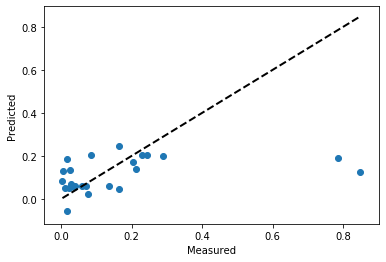

In [51]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-normalizados', usecols=  "E:O", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)

X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(14, input_dim=9, kernel_initializer='glorot_normal', activation='relu'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='glorot_normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     



2.2328
1.7219067
1.5093049
2.0481107
1.9457552
2.4534676
2.3755238
2.3099
2.1326752
2.502023
1.9529783
2.3657184
2.4834177
2.4834177
2.0151958
2.1281996
2.1281996
2.1281996
2.1281996
2.0481107
1.815213
2.0481107
2.331507
2.086916
[7.0, 8.0, 8.0, 5.0, 10.0, 1.0] => 2.232800 (expected 0.622247)
[7.0, 6.0, 8.0, 5.0, 10.0, 2.0] => 1.721907 (expected 0.609008)
[7.0, 8.0, 8.0, 5.0, 10.0, 3.0] => 1.509305 (expected 0.239806)
[7.0, 6.0, 8.0, 5.0, 9.0, 2.0] => 2.048111 (expected 2.329992)
[7.0, 8.0, 8.0, 5.0, 10.0, 2.0] => 1.945755 (expected 0.583529)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0] => 2.453468 (expected 4.239908)
[5.0, 8.0, 8.0, 5.0, 10.0, 1.0] => 2.375524 (expected 18.225274)
[5.0, 8.0, 8.0, 5.0, 9.0, 2.0] => 2.309900 (expected 4.457440)
[3.0, 8.0, 8.0, 5.0, 10.0, 2.0] => 2.132675 (expected 4.802120)
[3.0, 8.0, 9.0, 5.0, 10.0, 1.0] => 2.502023 (expected 1.708161)
[3.0, 8.0, 8.0, 5.0, 5.0, 2.0] => 1.952978 (expected 3.375710)
[3.0, 8.0, 8.0, 5.0, 9.0, 2.0] => 2.365718 (expected 15.146095)
[3.0,

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-20.16729036  -2.44300036 -13.331023  ]
Results: -11.98 (7.30) MSE


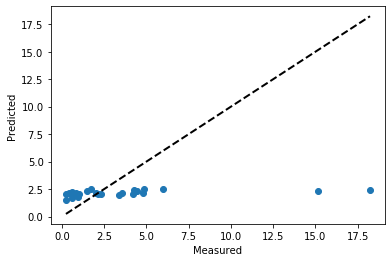

In [22]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-sin-parametros-adic', usecols=  "D:K", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:7]
Y = dataset[0:71,7]
#print(Y)
#print(X)

X_test = dataset[71:95,1:7]
Y_test = dataset[71:95,7]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=6, kernel_initializer='he_uniform', activation='tanh'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=20, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print("RMSE: %f" % rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     



1.271052
0.20815592
2.8840127
2.6463
2.216824
12.050908
9.637521
8.657617
4.1899705
4.790317
5.334456
3.9631433
5.5103855
8.024153
0.41104782
1.3683555
-0.010947301
-0.010947301
-0.010946586
0.071333215
1.4987305
0.07133274
0.12869667
0.08005576
[3.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 1.0, 3.0] => 1.271052 (expected 0.427944)
[3.0, 7.0, 9.0, 10.0, 9.0, 10.0, 3.0, 1.0, 4.0] => 0.208156 (expected 0.340306)
[3.0, 10.0, 9.0, 10.0, 9.0, 7.0, 10.0, 4.0, 5.0] => 2.884013 (expected 0.198738)
[3.0, 7.0, 9.0, 10.0, 10.0, 10.0, 3.0, 10.0, 3.0] => 2.646300 (expected 1.633242)
[3.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 1.0, 6.0] => 2.216824 (expected 0.481466)
[7.0, 10.0, 9.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0] => 12.050908 (expected 4.833452)
[7.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 10.0, 8.0] => 9.637521 (expected 19.828288)
[7.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 6.0] => 8.657617 (expected 4.801875)
[8.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 8.0, 2.0] => 4.189970 (expected 4.663474)
[8.0, 10.0, 10

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-11.67110205  -1.54059627  -9.13935587]
Results: -7.45 (4.30) MSE


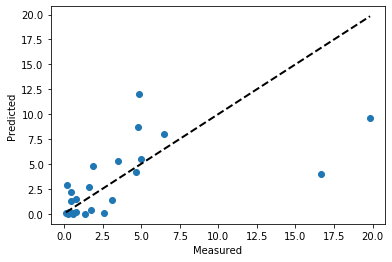

In [12]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-con-calif-calib', usecols=  "D:N", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)

X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(16, input_dim=9, kernel_initializer='uniform', activation='exponential'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='uniform', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=20, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     


1.8312883
0.9154589
3.7083461
3.1603673
3.0331051
15.685078
11.558761
9.433575
4.0387363
5.7186127
5.6717544
4.5517406
6.7062016
9.55028
0.97724706
2.29327
0.7198843
0.7198843
0.7198839
0.7488699
2.6145804
0.74887025
0.7485422
0.7209607
[3.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 1.0, 3.0] => 1.831288 (expected 0.342062)
[3.0, 7.0, 9.0, 10.0, 9.0, 10.0, 3.0, 1.0, 4.0] => 0.915459 (expected 0.248134)
[3.0, 10.0, 9.0, 10.0, 9.0, 7.0, 10.0, 4.0, 5.0] => 3.708346 (expected 0.181520)
[3.0, 7.0, 9.0, 10.0, 10.0, 10.0, 3.0, 10.0, 3.0] => 3.160367 (expected 1.597290)
[3.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 1.0, 6.0] => 3.033105 (expected 0.475034)
[7.0, 10.0, 9.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0] => 15.685078 (expected 4.864736)
[7.0, 10.0, 9.0, 10.0, 9.0, 9.0, 10.0, 10.0, 8.0] => 11.558761 (expected 19.521962)
[7.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 6.0] => 9.433575 (expected 4.631842)
[8.0, 10.0, 9.0, 10.0, 9.0, 10.0, 10.0, 8.0, 2.0] => 4.038736 (expected 4.012149)
[8.0, 10.0, 10.0, 10.0

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-7.68593649 -1.2550685  -8.65143249]
Results: -5.86 (3.28) MSE


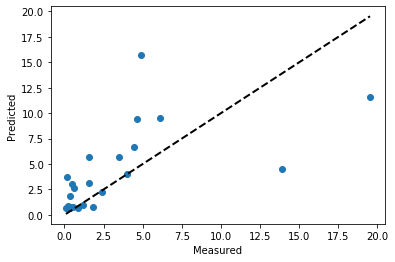

In [36]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-con-calif-calib (2)', usecols=  "D:N", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)
#dataset = loadtxt('NT2006-copia.csv', delimiter=',')
#X = dataset[:,3:12]
#Y = dataset[:,13]
#Y = dataset[:,17]

#dataset = loadtxt('NT2010-copia1.csv', delimiter=',') #sin sacar valores atípicos
X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
#Y_test = dataset[:, 16]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='exponential'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     


1.1116327
1.2422599
2.337224
0.8526882
3.9216752
3.7501578
3.2110896
3.4192445
4.415898
3.4912736
3.1398394
3.0423887
3.2799563
3.4229937
0.9357998
2.2512875
0.7295075
0.7295075
0.7295075
0.73910224
2.7469683
0.73910224
0.71594226
0.68039453
[7.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 4.0, 0.0] => 1.111633 (expected 0.441807)
[7.0, 6.0, 8.0, 5.0, 10.0, 2.0, 4.0, 4.0, 3.0] => 1.242260 (expected 0.407556)
[7.0, 8.0, 8.0, 5.0, 10.0, 3.0, 8.0, 7.0, 4.0] => 2.337224 (expected 0.232302)
[7.0, 6.0, 8.0, 5.0, 9.0, 2.0, 4.0, 6.0, 0.0] => 0.852688 (expected 1.516520)
[7.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 4.0, 10.0] => 3.921675 (expected 0.596819)
[5.0, 8.0, 8.0, 5.0, 9.0, 1.0, 8.0, 6.0, 10.0] => 3.750158 (expected 4.304905)
[5.0, 8.0, 8.0, 5.0, 10.0, 1.0, 8.0, 6.0, 8.0] => 3.211090 (expected 17.572865)
[5.0, 8.0, 8.0, 5.0, 9.0, 2.0, 8.0, 6.0, 9.0] => 3.419245 (expected 4.485183)
[3.0, 8.0, 8.0, 5.0, 10.0, 2.0, 8.0, 10.0, 10.0] => 4.415898 (expected 5.127859)
[3.0, 8.0, 9.0, 5.0, 10.0, 1.0, 8.0, 9.0, 8.0

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


[-15.87259634  -3.29313598 -11.12963355]
Results: -10.10 (5.19) MSE


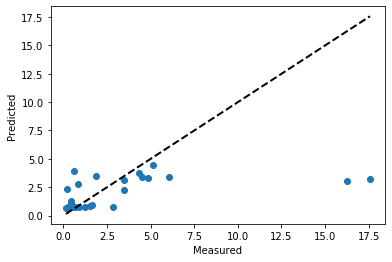

In [41]:
dataset = pd.read_excel('NT-completo(2).xls', sheet_name='NT-con-calif-sin-calib', usecols=  "D:N", skiprows=[0,1])
dataset = np.asarray(dataset)
X = dataset[0:71,1:10]
Y = dataset[0:71,10]
#print(Y)
#print(X)
#dataset = loadtxt('NT2006-copia.csv', delimiter=',')
#X = dataset[:,3:12]
#Y = dataset[:,13]
#Y = dataset[:,17]

#dataset = loadtxt('NT2010-copia1.csv', delimiter=',') #sin sacar valores atípicos
X_test = dataset[71:95,1:10]
Y_test = dataset[71:95,10]
#Y_test = dataset[:, 16]
nit = dataset[71:95:,0]

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=9, kernel_initializer='normal', activation='exponential'))
	#model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
estimator.fit(X, Y)
y_pred = estimator.predict(X_test)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y_test)):
	print('%s => %f (expected %f)' % (X_test[i].tolist(), y_pred[i], Y_test[i]))

print(rmse(y_pred, Y_test))
print(corr(y_pred, Y_test, nit))

fig,ax = plt.subplots()
ax.scatter(Y_test, y_pred)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
#//////////////////////////////////////////////////////////
#y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#print(y_pred)

results = cross_val_score(estimator, X, Y)
print(results)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

outfile = open('results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], y_pred))
outfile.close()


#y_pred['org_id'].unique().to_csv("results.csv", index=False)     


0.14446563
0.10013599
0.14235313
0.1216638
0.1798082
0.18512447
0.124918245
0.13451073
0.12126079
0.15866935
0.15611699
0.14300014
0.13546188
0.13326654
0.10877152
0.110874444
0.11237414
0.11277044
0.14619258
0.14842182
0.11916721
0.1189007
0.117996395
0.11733068
[0.18697137, 0.143, 0.0171, 0.9906] => 0.144466 (expected 0.017706)
[-0.05571811, 0.0544, 0.0062, 0.3341] => 0.100136 (expected 0.016258)
[0.12845565, 0.1178, 0.0574, 1.001] => 0.142353 (expected 0.006640)
[0.060555242, 0.072, 0.0412, 0.43] => 0.121664 (expected 0.070270)
[0.13311614, 0.1199, 0.8672, 0.9909] => 0.179808 (expected 0.024092)
[0.17193203, 0.2048, 0.8523, 0.9813] => 0.185124 (expected 0.204347)
[0.12625289, 0.1453, 0.4139, 1.0113] => 0.124918 (expected 0.849206)
[0.13938943, 0.2169, 0.8669, 0.9982] => 0.134511 (expected 0.213150)
[0.20463252, 0.1462, 0.0004, 1.0008] => 0.121261 (expected 0.244030)
[0.20404316, 0.1985, 0.6885, 1.0142] => 0.158669 (expected 0.084748)
[0.24724945, 0.2156, 0.5246, 0.9924] => 0.156117 

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


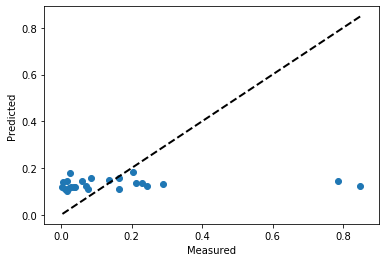

In [44]:
dataset = pd.read_excel('Vul-pred.xlsx', sheet_name='reales-normalizados', usecols=  "C:H", skiprows=[0,1,2,3,4])
dataset = np.asarray(dataset)
X = dataset[:,1:5]
Y = dataset[:,5]
nit = dataset[:,0]


#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='linear'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=20, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
#estimator.fit(X_train, Y_train)
#y_pred = estimator.predict(X_test)
y_pred = cross_val_predict(estimator, X, Y, cv=10)
for i in range(len(y_pred)):
  print(y_pred[i])

for i in range(len(Y)):
	print('%s => %f (expected %f)' % (X[i].tolist(), y_pred[i], Y[i]))

print(rmse(y_pred, Y))
coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
print(corr(y_pred, Y, nit))

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


0.4037289
0.35942546
0.2655039
0.8497896
0.10305774
1.8976963
1.3175337
0.75016767
1.1151906
1.479702
2.8664308
1.6049368
2.1313803
2.1313803
1.4069573
0.74213386
0.64624226
0.64624226
0.61986554
0.7443565
0.46158552
0.8729694
0.4415202
0.32208723
[1.5062059, 2.1935, 0.4289, 0.4289] => 0.403729 (expected 0.622247)
[0.86093843, 2.3956, 0.3136, 0.3136] => 0.359425 (expected 0.609008)
[2.1279564, 3.1138, -17.3283, 0.3853] => 0.265504 (expected 0.239806)
[1.4339463, 2.0416, 2.8072, 2.8072] => 0.849790 (expected 2.329992)
[1.8163041, 2.3121, -14.6157, 0.9992] => 0.103058 (expected 0.583529)
[2.7779984, 9.924, 4.5817, 4.5817] => 1.897696 (expected 4.239908)
[2.1832442, 5.2682, 5.085, 4.7335] => 1.317534 (expected 18.225274)
[3.0662565, 3.7737, 0.7567, 0.7567] => 0.750168 (expected 4.457440)
[3.1955295, 4.7474, 3.0857, 3.0857] => 1.115191 (expected 4.802120)
[3.4518132, 3.6945, 4.0774, 5.2187] => 1.479702 (expected 1.708161)
[6.4888306, 3.7132, 12.6765, 12.6759] => 2.866431 (expected 3.375710

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


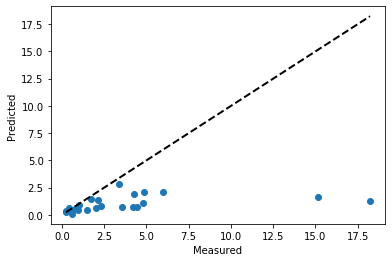

In [31]:
dataset = pd.read_excel('Vul-pred.xlsx', sheet_name='calif_sin_par_adic', usecols=  "B:G", skiprows=[0,1,2,3,4])
dataset = np.asarray(dataset)
X = dataset[:,1:5]
Y = dataset[:,5]
nit = dataset[:,0]


#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
#estimator.fit(X_train, Y_train)
#y_pred = estimator.predict(X_test)
y_pred = cross_val_predict(estimator, X, Y, cv=10)

for i in range(len(y_pred)):
	print(y_pred[i])

for i in range(len(Y)):
	print('%s => %f (expected %f)' % (X[i].tolist(), y_pred[i], Y[i]))

print(rmse(y_pred, Y))
coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
print(corr(y_pred, Y, nit))

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


0.059342224
0.22869484
0.33510602
0.6123048
0.24022408
2.2109303
1.629205
1.5525014
0.6490634
1.5438491
0.8006107
0.894974
1.2064404
1.5133722
0.59589386
0.54065424
0.25720912
0.25720912
0.26609093
0.38022345
0.0741523
0.06404455
0.21840176
0.21711498
[1.1713398, 3.4235, -15.3824, -10.8275] => 0.059342 (expected 0.427944)
[0.3623055, 3.4235, 0.5886, 0.634] => 0.228695 (expected 0.340306)
[2.4452667, 3.419, 3.2335, 0.333] => 0.335106 (expected 0.198738)
[2.1517942, 3.4235, 2.5464, 2.7625] => 0.612305 (expected 1.633242)
[1.8688418, 3.4235, -9.8171, -7.6651] => 0.240224 (expected 0.481466)
[13.420943, 10.3538, 12.7591, 12.9895] => 2.210930 (expected 4.833452)
[10.469181, 10.3326, 11.6449, 11.4723] => 1.629205 (expected 19.828288)
[9.261826, 10.3538, 10.9558, 11.0044] => 1.552501 (expected 4.801875)
[4.7452507, 3.426, 3.9295, 3.4371] => 0.649063 (expected 4.663474)
[5.3488936, 9.9731, 12.7693, 14.8682] => 1.543849 (expected 1.856582)
[5.57058, 4.4496, 4.7206, 3.5794] => 0.800611 (expected

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


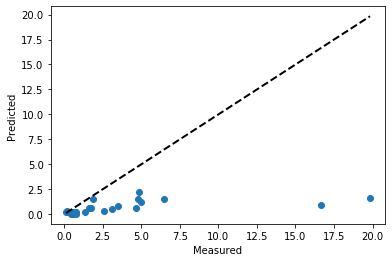

In [43]:
dataset = pd.read_excel('Vul-pred.xlsx', sheet_name='calif_calibradas', usecols= "B:G", skiprows=[0,1,2,3,4])
dataset = np.asarray(dataset)
X = dataset[:,1:5]
Y = dataset[:,5]
nit = dataset[:,0]


#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adagrad', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
#estimator.fit(X_train, Y_train)
#y_pred = estimator.predict(X_test)
y_pred = cross_val_predict(estimator, X, Y, cv=10)
for i in range(len(y_pred)):
  print(y_pred[i])


for i in range(len(Y)):
	print('%s => %f (expected %f)' % (X[i].tolist(), y_pred[i], Y[i]))

print(rmse(y_pred, Y))
coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
print(corr(y_pred, Y, nit))

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


-0.10719884
0.027167471
0.050894007
0.124620624
0.072546594
0.50684917
0.2599042
0.23745474
0.09312321
0.21949509
0.13405357
0.11236483
0.13068685
0.17488009
0.09719758
0.067531586
0.04641886
0.04641886
0.07619799
0.12691027
0.028166153
0.03394623
0.0031251237
0.003173288
[1.8312883, 3.3127, -13.9925, -8.0451] => -0.107199 (expected 0.342062)
[0.9154589, 3.3127, 0.6284, 0.4649] => 0.027167 (expected 0.248134)
[3.7083461, 3.2961, 2.9042, -1.4508] => 0.050894 (expected 0.181520)
[3.1603673, 3.3127, 2.6399, 1.8013] => 0.124621 (expected 1.597290)
[3.0331051, 3.3127, -9.0089, -6.0879] => 0.072547 (expected 0.475034)
[15.685078, 9.6258, 12.5818, 13.2367] => 0.506849 (expected 4.864736)
[11.558761, 9.6621, 11.8673, 11.4505] => 0.259904 (expected 19.521962)
[9.433575, 9.632, 10.4961, 10.3872] => 0.237455 (expected 4.631842)
[4.0387363, 3.5227, 3.4144, 2.6392] => 0.093123 (expected 4.012149)
[5.7186127, 4.3172, 11.4555, 10.6539] => 0.219495 (expected 1.592039)
[5.6717544, 4.0866, 5.3062, 3.663

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


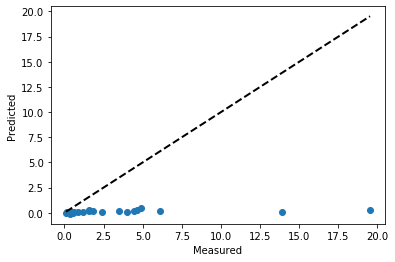

In [23]:
dataset = pd.read_excel('Vul-pred.xlsx', sheet_name='calif_calibradas(2)', usecols=  "B:G", skiprows=[0,1,2,3,4])
dataset = np.asarray(dataset)
X = dataset[:,1:5]
Y = dataset[:,5]
nit = dataset[:,0]


#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=10, verbose=0)
#kfold = KFold(n_splits=10)
#estimator.fit(X_train, Y_train)
#y_pred = estimator.predict(X_test)
y_pred = cross_val_predict(estimator, X, Y, cv=10)
for i in range(len(y_pred)):
    print(y_pred[i])
    
for i in range(len(Y)):
	print('%s => %f (expected %f)' % (X[i].tolist(), y_pred[i], Y[i]))

print(rmse(y_pred, Y))
coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
print(corr(y_pred, Y, nit))

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()


0.013682107
0.01731019
0.014525825
0.05902388
0.28340995
0.21386904
0.20465551
0.34622288
0.08825494
0.11933513
0.15328512
0.15968934
0.13805008
0.13932389
0.012313994
0.017499834
0.04557039
0.04557039
0.043107208
0.049279194
0.028391574
0.023712723
0.024275048
0.022017725
[1.8307152, 3.0327, 0.0743, 0.0759] => 0.013682 (expected 0.441807)
[1.5859295, 1.5386, 0.2317, 0.2268] => 0.017310 (expected 0.407556)
[2.7610936, 2.5501, 0.1832, 0.2576] => 0.014526 (expected 0.232302)
[1.2879055, 1.4464, 0.2442, 0.2606] => 0.059024 (expected 1.516520)
[3.976584, 3.1929, 17.8923, 17.8182] => 0.283410 (expected 0.596819)
[4.0725794, 3.5953, 8.6144, 8.9387] => 0.213869 (expected 4.304905)
[3.6757903, 7.3878, 9.5716, 8.7969] => 0.204656 (expected 17.572865)
[3.8401573, 4.8774, 16.1031, 17.1514] => 0.346223 (expected 4.485183)
[5.060701, 6.4488, 3.523, 3.637] => 0.088255 (expected 5.127859)
[4.440263, 2.6709, 8.2557, 10.0806] => 0.119335 (expected 1.842968)
[3.8496022, 3.8221, 10.9505, 10.2979] => 0.15

C:\Users\ElianeHaidee\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


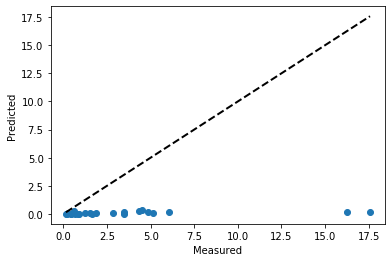

In [40]:
dataset = pd.read_excel('Vul-pred.xlsx', sheet_name='calif_no_calib', usecols=  "B:G", skiprows=[0,1,2,3,4])
dataset = np.asarray(dataset)
X = dataset[:,1:5]
Y = dataset[:,5]
nit = dataset[:,0]


#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.35, random_state = 0)

def rmse(predicts, targets): 
    return np.sqrt(((predicts - targets) ** 2).mean())

def corr(predicts, targets, nit):
    a = predicts - np.mean(predicts)
    b = nit - np.mean(nit)
    return sum(a*b) / (np.sqrt(sum(a**2))*(np.sqrt(sum(b**2))))

# define base model
def b_model():
	# create model
	model = Sequential()
	model.add(Dense(10, input_dim=4, kernel_initializer='normal', activation='relu'))
	#model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='linear'))
	model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mse'])
	return model

estimator = KerasRegressor(build_fn=b_model, epochs=10, batch_size=20, verbose=0)
#kfold = KFold(n_splits=10)
#estimator.fit(X_train, Y_train)
#y_pred = estimator.predict(X_test)
y_pred = cross_val_predict(estimator, X, Y, cv=10)

for i in range(len(y_pred)):
    print(y_pred[i])

for i in range(len(Y)):
	print('%s => %f (expected %f)' % (X[i].tolist(), y_pred[i], Y[i]))

print(rmse(y_pred, Y))
coef, p = spearmanr(y_pred, nit)
print('Spearmans correlation coefficient: %.3f' % coef)
print(corr(y_pred, Y, nit))

fig,ax = plt.subplots()
ax.scatter(Y, y_pred)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()
